Àlex Escolà Nixon

## Optimization: Lab 5

- ### An exercise: PCA analysis

The principal component analysis is defined as the following maximization problem:

$\underset{w}{max}$ $w^tAw$ subject to $w^t w =1$

Being A the covariance matrix of the data. Here the covariance matrix already defined in the Machine Learning notebook s considered:

In [1]:
import numpy as np
from numpy.linalg import norm

m1 = [4.,-1.]
s1 = [[1,0.9],[0.9,1]]
c1 = np.random.multivariate_normal(m1,s1,100)
A=np.cov(c1.T)

Where the Lagrangian is directly formulated as:
\begin{equation}
L\left (w,\lambda\right) = w^tAw -\lambda\left (w^tw -1\right)
\end{equation}

The maximization problem can be rewritten as a minimization problem by changing the signs of the terms in the Lagrangian, this is: 

\begin{equation}
L\left (w,\lambda\right) = -w^tAw +\lambda\left (w^tw -1\right)
\end{equation}

In order to find the optimal w that minimizes the above problem, where going to use the projected gradient descent method. The key point of this method is that at each of the steps we move in the direction of the negative gradient, as in the ordinary gradient descent case, and then project the points we find onto the feasible set. This reduces the space of search only on the feasible set and guarantees a much faster convergence.

In order to calculate the projection of w onto the feasible set at each step, we only have to normalize the vector w, given that the constraint is implying that the euclidean norm of the vector has to be 1. This can simply be done by dividing by the euclidean norm of w at each step:

\begin{equation}
\hat{w}^k=\frac{w^k}{\left \| w^k \right \|}
\end{equation}

The gradient of the Lagrangian, as well as an estimate of $\lambda$ will have to be calculated for the algorithm:

\begin{equation}
\nabla _w L(w,\lambda) 
\end{equation}

\begin{equation}
\nabla _w L(w,\lambda)  = \nabla _w \left (-w^tAw + \lambda \left ( w^tw-1 \right)\right) = -w^tA^t-w^tA + \lambda \left ( w^t+w^t \right)
\end{equation}



Where, taking into account that A is a square matrix, the above equation can be reduced to:

\begin{equation}
\nabla _w L(w,\lambda)  = -2Aw + 2w^t \lambda
\end{equation}

An estimate of $\lambda$ can be computed by minimizing $\left \| \nabla L(w^k) \right \|^2$. This can be done by derivating respect to $\lambda$ and equating to 0:

\begin{equation}
\frac{\partial }{\partial \lambda} \left \| \nabla L(x) \right \|^2=0
\end{equation}
Where, by doing so we obtain:

\begin{equation}
\frac{\partial }{\partial \lambda} \left \| -2Aw + 2w^t\lambda \right \|^2 = 0
\end{equation}
\begin{equation}
\frac{\partial }{\partial \lambda} \left ( 4A^2 \left \| w \right \|  ^2 + 4\lambda ^2 \left \| w^t \right \| ^{2}-8\lambda Aw w^t \right) =0
\end{equation}
\begin{equation}
8\lambda \left \| w^t \right \| ^{2} - 8Aw w^{t}=0
\end{equation}

And we can solve for $\lambda$ obtaining:
\begin{equation}
\lambda= \frac{w^{t}Aw}{\left \| w^t \right \| ^{2}}
\end{equation}

In [11]:
import numpy as np

# Tolerance
tol=1e-08

# Initial alpha value (line search)
alpha=1.0

# Initial values. 
w=np.array([2,3])

# Normalization of the w vector to project onto the feasible set
den = norm(w,2)
w = w/den

# Given current values of  (x,y), compute the value of lambda
# that minimizes the modulus of the gradient of the Lagrangian

num=A.dot(w).dot(w.T)
den=norm(w.T,2)**2
lam=num/den

# Compute Lagrangian. Points x and y should be over the ellipse
f= -w.T.dot(A.dot(w)) + lam * (w.T.dot(w)-1)
cont=0

print "Initial values"
print "  Function value =", f, " w =", w

while ((alpha > tol) and (cont < 100000)):
    cont=cont+1
    
    # Gradient of the Lagrangian
    grw = -2*A.dot(w) + 2*lam*w
    
    # Used to know if we finished line search
    finished = 0
    
    while ((finished == 0) and (alpha > tol)):
        # Update
        aux_w=w-alpha*grw
    
        # Normalization of the w vector to project onto the feasible set
        den = norm(aux_w,2)
        aux_w = aux_w/den
    
        # Compute new value of the Lagrangian. 
        
        num=A.dot(aux_w).dot(aux_w.T)
        den=norm(aux_w.T,2)**2
        aux_lam=num/den
        
        aux_f = -aux_w.T.dot(A.dot(aux_w)) + aux_lam * (aux_w.T.dot(aux_w)-1)
        
        # Check if this is a descent
        if aux_f<f:
            w=aux_w
            lam=aux_lam
            f=aux_f
            alpha=1.0
            finished = 1
        else:
            alpha=alpha/2.0

print "Final values"
print "  Number of iterations", cont
print "  Function value ", f
print "  Obtained values are w =", w, "  lambda =", lam

Initial values
  Function value = -2.02034141363  w = [ 0.5547002   0.83205029]
Final values
  Number of iterations 340
  Function value  -2.12727726535
  Obtained values are w = [ 0.73039086  0.68302942]   lambda = 2.12727726535


We have therefore found a solution for w. We can ascertain that the result is correct by checking the following equality, derived from the analytical solution of the PCA problem

\begin{equation}
\frac{Aw}{w^tAw}=\frac{w}{w^t w}
\end{equation}

Which is done with the following code:

In [12]:
num=A.dot(w)
den=w.T.dot(A.dot(w))
print "Left term:", (num.dot(1/den))
num=w
den=w.T.dot(w)
print "Right term:",(num.dot(1/den))

Left term: [ 0.73039086  0.68302942]
Right term: [ 0.73039086  0.68302942]


As it can be see the equality is satisfied. This means that indeed this vector w corresponds to the largest eigenvalue. Hereunder the same code as in the PCA analysis Machine Learning lesson is used, and in the right hand side figure the vector w is used instead of the eigenvectors corresponding to the largest eigenvalues: 

In [209]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

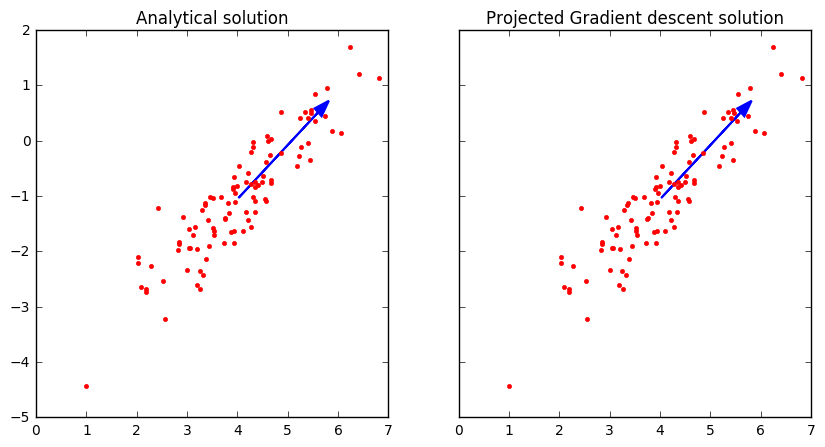

In [262]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
vaps,veps = np.linalg.eig(np.cov(c1.T)) 
idx = np.argmax(vaps)
ax1.plot(c1[:,0],c1[:,1],'r.')
ax1.set_title('Analytical solution')
f.set_figheight(5)
f.set_figwidth(10)
ax1.arrow(np.mean(c1[:,0]),np.mean(c1[:,1]),
          vaps[idx]*veps[0,idx],vaps[idx]*veps[1,idx],
          linewidth=1.5,head_width=0.2,color='blue')

ax2.plot(c1[:,0],c1[:,1],'r.')
ax2.set_title('Projected Gradient descent solution')
ax2.arrow(np.mean(c1[:,0]),np.mean(c1[:,1]),
          vaps[idx]*w[0],vaps[idx]*w[1],
          linewidth=1.5,head_width=0.2,color='blue')

